In [331]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm

myparams = {
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'font.family': 'Djvu Serif',
    'font.size': 14,
    'axes.grid': True,
    'grid.alpha': 0.1,
    'lines.linewidth': 2
}

plt.rcParams.update(myparams)

%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [332]:
from population import Population
from chromosome import Chromosome
from algorithm import Algorithm
from ga_operations import *

In [333]:
import os
import pickle

def save_object(obj, filename):
    # Overwrites any existing file.
    with open(filename, 'wb') as outp:
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)


def load_object(filename):
    with open(filename, 'rb') as inp:
        obj = pickle.load(inp)
        return obj

Загрузим данные, полученные в `data.ipynb`

# Regression

In [334]:
results_regression = load_object("../plots/datasets_regression.pkl")

С помощью генетического алгоритма найдем семейство функций, которые лучше всего приближают исследуемый набор зависимостей

In [336]:
POP_SIZE = 1000 #number of chromosomes in population
NUM_FOR_SELECTION = POP_SIZE // 3 #number of chromosomes to be chosen for selection
FUNCTIONS = {1: ['sin', 'cos', 'exp', 'log', 'ctg', 'cth'], 
             2: ['+', '-', '*', '/']} # unary and binary functions
DEPTH = 1 # initial depth of trees
MAX_DEPTH = 4 # maximum depth of a tree 
NUMBER_ITERS = 1000 # number of iterations

pop = Population(POP_SIZE, NUM_FOR_SELECTION, FUNCTIONS, DEPTH, MAX_DEPTH) # create the population
alg = Algorithm(pop, NUMBER_ITERS, datasets=results_regression, epoch_feedback=100) # create the algorithm
best = alg.train() #train the alrogithm

Training process has started
[Epoch 100/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0021650744606389457
[Epoch 200/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0021650744606389457
[Epoch 300/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0021650744606389457
[Epoch 400/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0021650744606389457
[Epoch 500/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0021650744606389457
[Epoch 600/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0021650744606389457
[Epoch 700/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0021650744606389457
[Epoch 800/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0021650744606389457
[Epoch 900/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0021650744606389457
[Epoch 1000/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0021650744606389457


MSE: 0.0012520694626005737


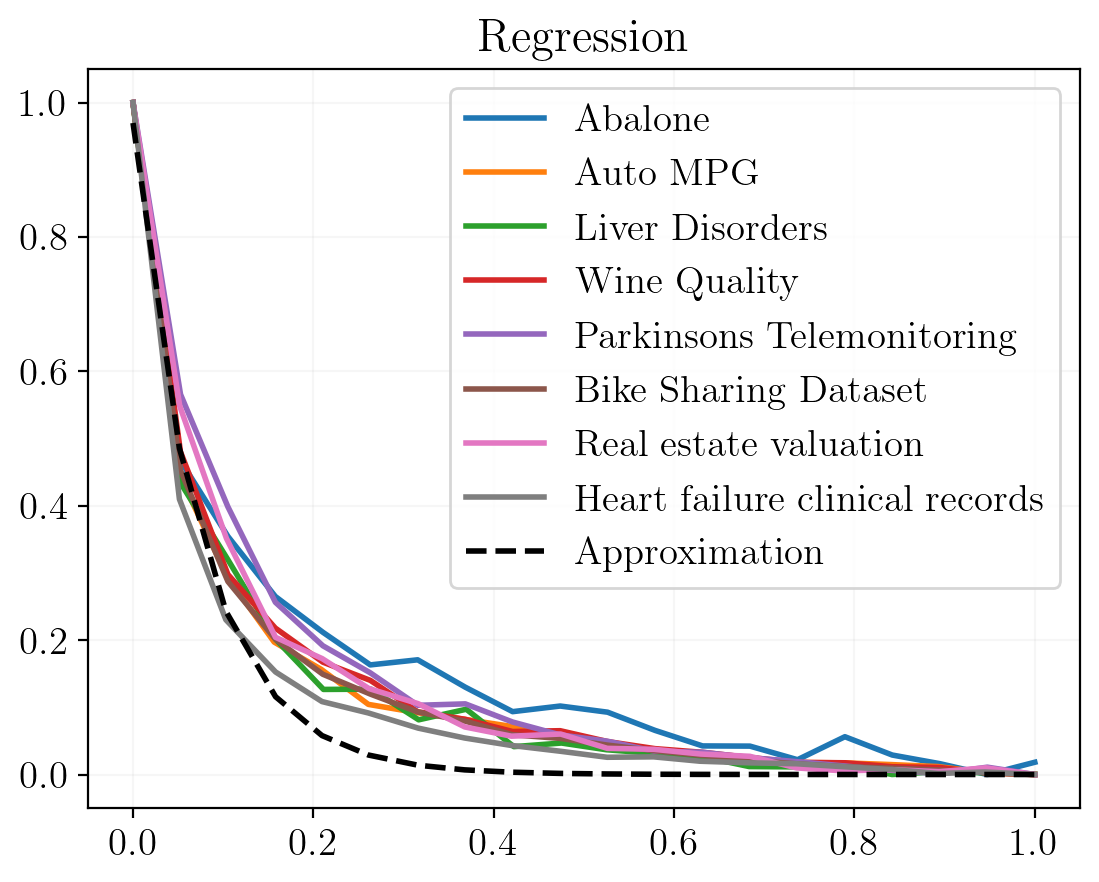

In [337]:
for name in results_regression.keys():
    sample_sizes = results_regression[name]['sample_sizes']
    mean = results_regression[name]['mean']
    x_vals = sample_sizes - min(sample_sizes)
    x_vals = x_vals / max(x_vals)
    y_vals = mean - min(mean)
    y_vals = y_vals / max(y_vals)
    plt.plot(x_vals, y_vals, label=name)

#print(best) # print best function
print(f"MSE: {best.calculate_fitness(X=x_vals, y=y_vals)}")
y_pred = [best.evaluate(x, best.w_opt) for x in x_vals] #predictions of our best calculated function
 
plt.plot(x_vals, y_pred, color='black', linestyle='dashed', label='Approximation')  #plot original function
plt.legend()
plt.title('Regression')
plt.show()

Посмотрим, какое семейство функций получилось

In [338]:
print(best)

w[0]*exp(w[1]*x)


Учитывая то, что при аппроксимации зависимости нормировались на [0, 1], нам потребуется добавить еще один параметр в исследуемое семейство. Итак, получаем семейство функций для аппроксимации функции правдоподобия в задаче регрессии

$$ w_0 + w_1 \cdot \exp(w_2 \cdot x) $$

# Classification

In [339]:
results_classification = load_object("../plots/datasets_classification.pkl")

С помощью генетического алгоритма найдем семейство функций, которые лучше всего приближают исследуемый набор зависимостей

In [340]:
POP_SIZE = 1000 # number of chromosomes in population
NUM_FOR_SELECTION = POP_SIZE // 3 # number of chromosomes to be chosen for selection
FUNCTIONS = {1: ['sin', 'cos', 'exp', 'log', 'ctg', 'cth'], 
             2: ['+', '-', '*', '/']} # unary and binary functions
DEPTH = 1 # initial depth of trees
MAX_DEPTH = 8 # maximum depth of a tree 
NUMBER_ITERS = 1000 # number of iterations

pop = Population(POP_SIZE, NUM_FOR_SELECTION, FUNCTIONS, DEPTH, MAX_DEPTH) # create the population
alg = Algorithm(pop, NUMBER_ITERS, datasets=results_classification, epoch_feedback=100) # create the algorithm
best = alg.train() #train the alrogithm

Training process has started
[Epoch 100/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0020354046943720666
[Epoch 200/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0020354046943720666
[Epoch 300/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0020354046943720666
[Epoch 400/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0020354046943720666
[Epoch 500/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0020354046943720666
[Epoch 600/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0020354046943720666
[Epoch 700/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0020354046943720666
[Epoch 800/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0020354046943720666
[Epoch 900/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0020354046943720666
[Epoch 1000/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0020354046943720666


MSE: 0.0005199121732216948


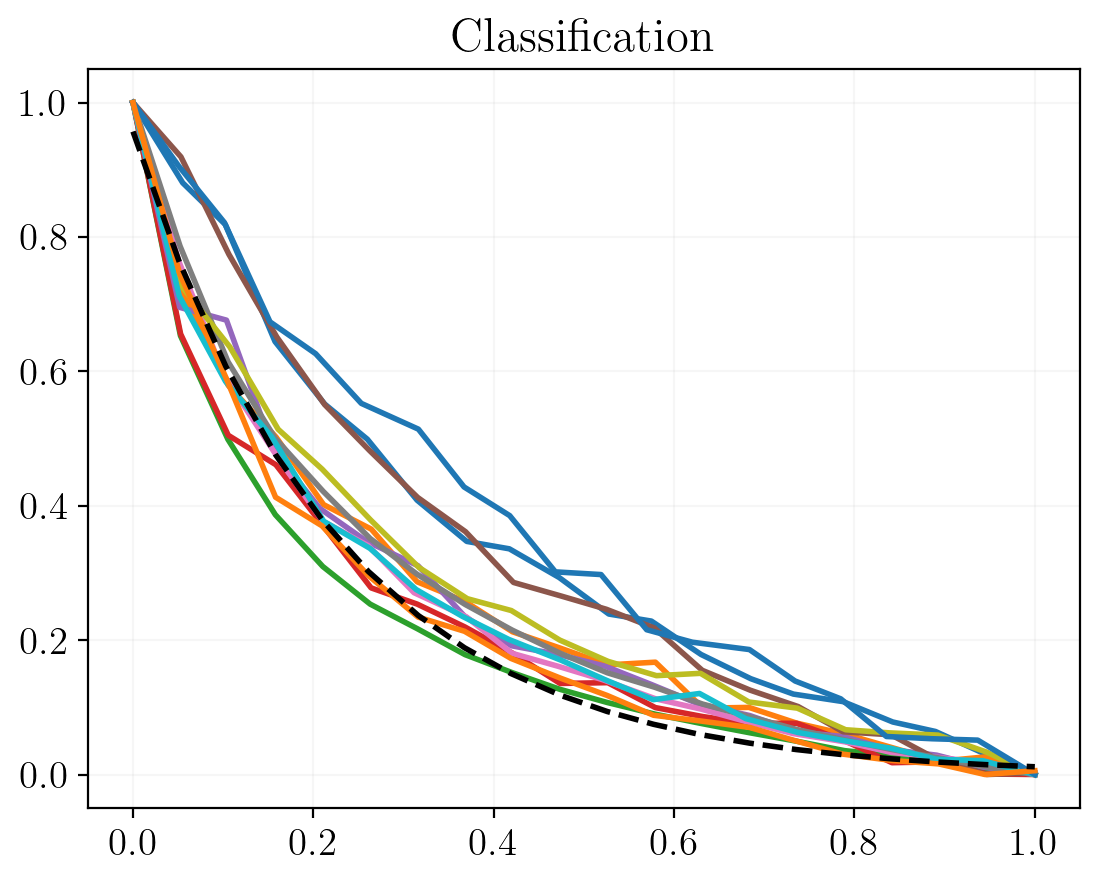

In [343]:
for name in results_classification.keys():
    sample_sizes = results_classification[name]['sample_sizes']
    mean = results_classification[name]['mean']
    x_vals = sample_sizes - min(sample_sizes)
    x_vals = x_vals / max(x_vals)
    y_vals = mean - min(mean)
    y_vals = y_vals / max(y_vals)
    plt.plot(x_vals, y_vals, label=name)

#print(best) # print best function
print(f"MSE: {best.calculate_fitness(X=x_vals, y=y_vals)}")
y_pred = [best.evaluate(x, best.w_opt) for x in x_vals] #predictions of our best calculated function
 
plt.plot(x_vals, y_pred, color='black', linestyle='dashed', label='Approximation')  #plot original function
#plt.legend()
plt.title('Classification')
plt.show()

Посмотрим, какое семейство функций получилось

In [342]:
print(best)

w[0]*exp(w[1]*x)

Учитывая то, что при аппроксимации зависимости нормировались на [0, 1], нам потребуется добавить еще один параметр в исследуемое семейство. Итак, получаем семейство функций для аппроксимации функции правдоподобия в задаче регрессии

$$ w_0 + w_1 \cdot \exp(w_2 \cdot x) $$